## Lasso regression for sparse data

In [ ]:
%load_ext autoreload
%autoreload 2

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import class_FM_QC as FM
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Initialize factorial model and sample dataset for k=3

In [3]:
n = 1000
k = 3
degree = 3
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)


### Fit Lasso regression with cross validation for alpha

In [9]:
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -1.039072    0.          0.00287061 -1.94102    -0.00826316
  0.10200795 -0.2885483 ]
Mean Squared Error of y: 0.010162831604398266
Mean Squared Error of beta: 0.00020149318152107298


### Compute expected outcomes as linear combinations of betas

In [ ]:
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -1.04  0.    0.   -2.98 -1.04  0.1  -3.17]


### Cluster treatment combinations by expected outcomes

In [ ]:
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0]; score: -12.87
Max clusters: 2; cluster labels: [1 1 1 1 0 1 1 0]; score: -1.55
Max clusters: 3; cluster labels: [1 2 1 1 0 2 1 0]; score: -0.03
Max clusters: 4; cluster labels: [1 2 1 1 0 2 1 3]; score: -0.01
Max clusters: 5; cluster labels: [1 2 1 1 0 2 4 3]; score: -0.00
Max clusters: 6; cluster labels: [1 2 1 1 0 5 4 3]; score: -0.00
Max clusters: 7; cluster labels: [6 2 6 1 0 5 4 3]; score: -0.00


### Plot betas and expected outcomes

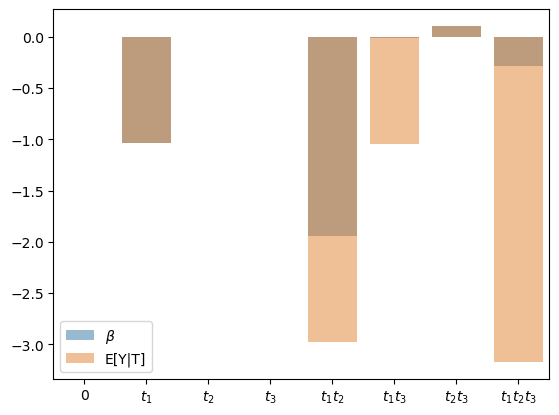

In [ ]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=4

In [ ]:
n = 1000
k = 4
degree = 4
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [ ]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -1.035448    0.7413757   0.9281001   0.         -0.01766558
  0.12114663 -0.30965605  0.          0.01041427  0.01005623 -0.
 -0.01030027 -0.          0.4079781  -0.8193734 ]


In [ ]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -1.04  0.74  0.93  0.   -0.31  0.01 -1.35  1.67  0.75  0.94  0.74
 -0.62 -0.29  2.1   0.03]


In [ ]:
print(betas.shape, expected_outcomes.shape)

(16,) (16,)


In [ ]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -12.88
Max clusters: 2; cluster labels: [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]; score: -6.92
Max clusters: 3; cluster labels: [2 2 1 1 2 2 2 2 0 1 1 1 2 2 0 2]; score: -2.17
Max clusters: 4; cluster labels: [2 3 1 1 2 2 2 3 0 1 1 1 2 2 0 2]; score: -0.55
Max clusters: 5; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 4 4 0 2]; score: -0.25
Max clusters: 6; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 4 4 5 2]; score: -0.16
Max clusters: 7; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 6 4 5 2]; score: -0.09
Max clusters: 8; cluster labels: [1 4 3 3 1 6 1 2 0 3 3 3 7 6 5 1]; score: -0.04
Max clusters: 9; cluster labels: [1 4 3 8 1 6 1 2 0 3 8 3 7 6 5 1]; score: -0.00
Max clusters: 10; cluster labels: [1 4 3 8 1 6 1 2 0 3 8 3 7 9 5 1]; score: -0.00
Max clusters: 11; cluster labels: [10  4  3  8 10  6  1  2  0  3  8  3  7  9  5  1]; score: -0.00
Max clusters: 12; cluster labels: [10  4 11  8 10  6  1  2  0  3  8 11  7  9  5  1]; score

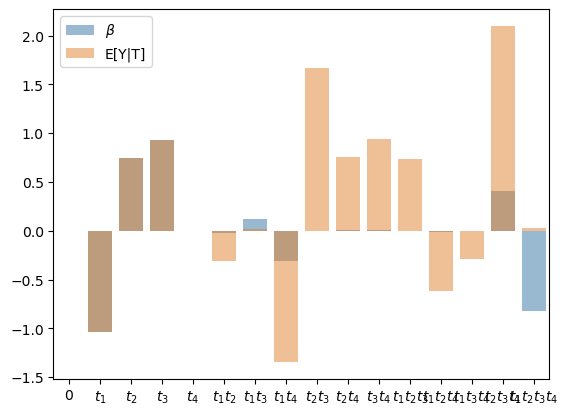

In [ ]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=5

In [ ]:
n = 1000
k = 5
degree = 5
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [ ]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.0000000e+00 -1.1775770e-02  7.4759305e-01  1.2007688e-02
  5.1933096e-04  5.9438688e-03  0.0000000e+00 -5.9729721e-02
  0.0000000e+00 -0.0000000e+00  2.6839564e-02  1.4461634e-02
 -0.0000000e+00  0.0000000e+00  3.7092009e-01 -8.6962891e-01
  4.2758536e-01  0.0000000e+00  1.4639428e-01 -7.6126275e-03
 -0.0000000e+00  0.0000000e+00  1.1022424e+00 -0.0000000e+00
 -3.3549345e-01 -3.0247265e-01 -0.0000000e+00  4.0273056e-03
  1.3373104e-01 -1.2975444e-01 -6.8424918e-02 -0.0000000e+00]


In [ ]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.01  0.75  0.01  0.    0.01  0.74 -0.06 -0.01 -0.01  0.79  0.76
  0.75  0.01  0.39 -0.86  1.14  0.75  0.89 -0.07  0.32 -0.87  1.9   1.16
 -0.44 -0.78  2.25  1.67 -0.17 -0.99  0.7   1.21]


In [ ]:
print(betas.shape, expected_outcomes.shape)

(32,) (32,)


In [ ]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -19.45
Max clusters: 2; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]; score: -6.12
Max clusters: 3; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 0]; score: -3.23
Max clusters: 4; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 1 0 0 0 3 3 1 2 0 1 1 2 2 3 1 0 0]; score: -1.01
Max clusters: 5; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 4 0 0 0 3 3 4 2 0 1 4 2 2 3 4 0 0]; score: -0.85
Max clusters: 6; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 0 4 5 0 0 3 3 4 2 5 1 4 2 2 3 4 0 5]; score: -0.48
Max clusters: 7; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 6 4 5 0 0 3 6 4 2 5 1 4 2 2 3 4 0 5]; score: -0.25
Max clusters: 8; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 6 4 5 0 0 3 6 4 2 5 1 4 7 2 3 4 0 5]; score: -0.10
Max clusters: 9; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 6 4 5 0 0 3 6 4 2 5 1 4 7 8 3 4 0

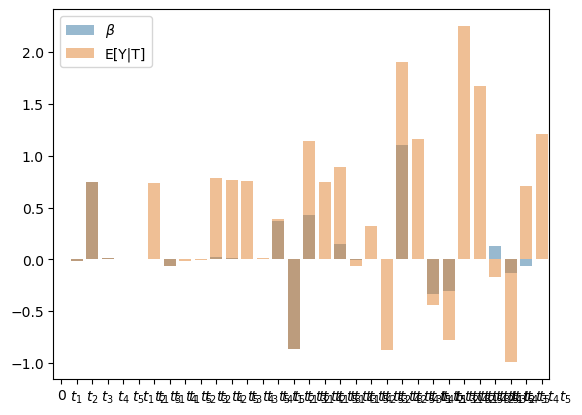

In [ ]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Generate data for m less than sp

In [57]:
#s = sparsity * len(beta)
#if k is 10: 88
# so error low if 88 * log(176) >= 197
def run_generation(n_max, k, sparsity):
    mse_dict = {}
    for n in range(20, n_max, 100):
        #dictionary for mse's
        
        degree = 3
        sigma = 0.1

        fm = FM.FactorialModel(
            n=n,
            k=k,
            degree=degree,
            sigma=sigma,
            sparsity=sparsity,
            beta_seed=42,
        )
        t, y = fm.sample(seed=0)

        pf = preprocessing.PolynomialFeatures(
        degree=degree, interaction_only=True, include_bias=True,
        )
        T = pf.fit_transform(t)
        T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
        alpha_cv = [0.001, 0.01, 0.1, 0.5]
        model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
        model.fit(T_train, y_train)
        # print(f'alpha={model.alpha_}\nbetas={model.coef_}')

        y_pred = model.predict(T_test)
        mse = mean_squared_error(y_test, y_pred)
        # print(f"Mean Squared Error of y: {mse}")

        beta_actual = fm.beta
        beta_hat = model.coef_
        mse_beta = mean_squared_error(beta_actual, beta_hat)
        # print(f"Mean Squared Error of beta: {mse_beta}")

        mse_dict[n] = (mse, mse_beta)
    return mse_dict, len(fm.beta)

In [58]:

def draw_charts(mse_dict):
    n = list(mse_dict.keys())
    mse, mse_beta = zip(*mse_dict.values())

    fig, ax1 = plt.subplots()

    # Plot the first line (mse) on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('n')
    ax1.set_ylabel('mse', color=color)
    ax1.plot(n, mse, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the second line (mse_beta)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mse_beta', color=color)
    ax2.plot(n, mse_beta, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # For layout
    plt.title('MSE and MSE_Beta vs n')
    plt.show()

In [59]:
def calc_tipping_point(sparsity, length):
    return np.log(length) * sparsity * length

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+00, tolerance: 3.750e-01
  model = cd_fast.enet_coordinate_descent(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.017e-01, tolerance: 3.750e-01
  model = cd_fast.enet_coordinate_descent(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

{20: (27.655149172902103, 0.7879641), 120: (28.051127780910775, 0.723026), 220: (15.97635711564731, 0.606974), 320: (5.635691491056438, 0.52920413), 420: (2.323565311629794, 0.36633444), 520: (1.8433884061421524, 0.26025656), 620: (1.1918880791887099, 0.1522324), 720: (0.8090420789013106, 0.10689111), 820: (0.5356406900097003, 0.08443204), 920: (0.4067269065716356, 0.06503018), 1020: (0.2820025063966404, 0.058421176), 1120: (0.22339822569861806, 0.044276886), 1220: (0.17527750824040503, 0.036462434), 1320: (0.09286255920929025, 0.026778294), 1420: (0.12107767743177811, 0.03026359), 1520: (0.10236308354369385, 0.02450352), 1620: (0.09893381325287304, 0.02463486), 1720: (0.09774359949301577, 0.022760658), 1820: (0.09267475382154669, 0.02212105), 1920: (0.09516732527608156, 0.022199042), 2020: (0.10132609248566325, 0.023531133), 2120: (0.0896841186987343, 0.022147024), 2220: (0.08056067796390941, 0.020568447), 2320: (0.0800178774379602, 0.020245798), 2420: (0.07065576384431692, 0.01870219

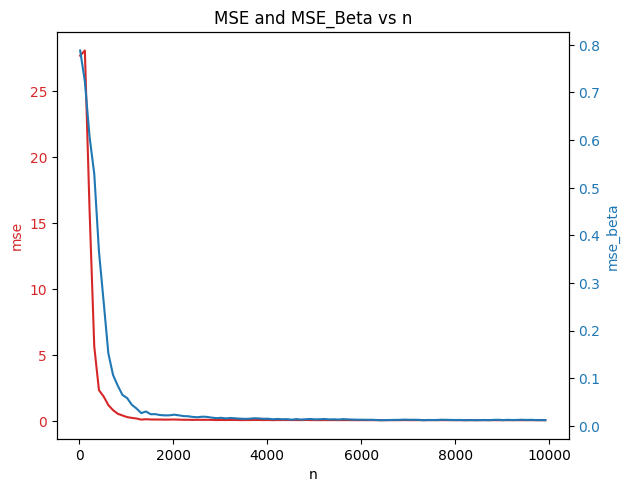

732.2236025121667


In [62]:
n_max = 10000
k = 15
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity)
print(mse_dict)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))